This script is to test the signal change in wet versus dry days in 2025. 

In [1]:
#Chunk that sloads necessary packages & sets working environment to where the jupyterlab notebook file is 
%load_ext autoreload
%autoreload 2
import gnssvod as gv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pdb
import importlib
import zipfile
import os
import xarray as xr
import glob
import shutil
from gnssvod.hemistats.hemistats import hemibuild
#import georinex as gr
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates
import shutil
from matplotlib import rcParams
from datetime import datetime, timedelta

In [2]:
#setting time intervals
startday = start=pd.to_datetime('01-01-2025',format='%d-%m-%Y')
timeintervals=pd.interval_range(start=startday, periods=365, freq='D', closed='left')
timeintervals

IntervalIndex([[2025-01-01 00:00:00, 2025-01-02 00:00:00),
               [2025-01-02 00:00:00, 2025-01-03 00:00:00),
               [2025-01-03 00:00:00, 2025-01-04 00:00:00),
               [2025-01-04 00:00:00, 2025-01-05 00:00:00),
               [2025-01-05 00:00:00, 2025-01-06 00:00:00),
               [2025-01-06 00:00:00, 2025-01-07 00:00:00),
               [2025-01-07 00:00:00, 2025-01-08 00:00:00),
               [2025-01-08 00:00:00, 2025-01-09 00:00:00),
               [2025-01-09 00:00:00, 2025-01-10 00:00:00),
               [2025-01-10 00:00:00, 2025-01-11 00:00:00),
               ...
               [2025-12-22 00:00:00, 2025-12-23 00:00:00),
               [2025-12-23 00:00:00, 2025-12-24 00:00:00),
               [2025-12-24 00:00:00, 2025-12-25 00:00:00),
               [2025-12-25 00:00:00, 2025-12-26 00:00:00),
               [2025-12-26 00:00:00, 2025-12-27 00:00:00),
               [2025-12-27 00:00:00, 2025-12-28 00:00:00),
               [2025-12-28 00:00:00, 

In [3]:
#loading csvs
# path
base_path = '/Volumes/coraldelmar/all_data/'

# Read all CSVs
vod_anom12 = pd.read_csv(base_path + 'vod_anom12.csv')
vod_anom13 = pd.read_csv(base_path + 'vod_anom13.csv')
vod_anom17 = pd.read_csv(base_path + 'vod_anom17.csv')
vod_anom57 = pd.read_csv(base_path + 'vod_anom57.csv')
#
ts12 = pd.read_csv(base_path + 'vod_ts_macrocosm12.csv')
ts13 = pd.read_csv(base_path + 'vod_ts_macrocosm13.csv')
ts17 = pd.read_csv(base_path + 'vod_ts_macrocosm17.csv')
ts57 = pd.read_csv(base_path + 'vod_ts_macrocosm57.csv')

#
more12 = pd.read_csv(base_path + 'vod_moreveg12.csv')
less12 = pd.read_csv(base_path + 'vod_lessveg12.csv')
more13 = pd.read_csv(base_path + 'vod_moreveg13.csv')
less13 = pd.read_csv(base_path + 'vod_lessveg13.csv')
more17 = pd.read_csv(base_path + 'vod_moreveg17.csv')
less17 = pd.read_csv(base_path + 'vod_lessveg17.csv')
more57 = pd.read_csv(base_path + 'vod_moreveg57.csv')
less57 = pd.read_csv(base_path + 'vod_lessveg57.csv')

In [4]:
#
plt.rcParams["font.family"] = "Times New Roman"

# loading precip data
precip_df = pd.read_excel("/Volumes/coraldelmar/weather.station_alonso/2025/precip05.xlsx")

#  full datetime with hour info directly
precip_df['Timestamp'] = pd.to_datetime(precip_df['Timestamp'], format='%d/%m/%Y %H:%M', dayfirst=True)

#  hour from timestamp
precip_df['hour'] = precip_df['Timestamp'].dt.hour

# grouping by hour
precip_hourly = precip_df.groupby('hour')['Rain_mm_Tot'].sum()
precip_hourly = precip_hourly.reindex(range(24), fill_value=0)  # ensure 0–23 coverage


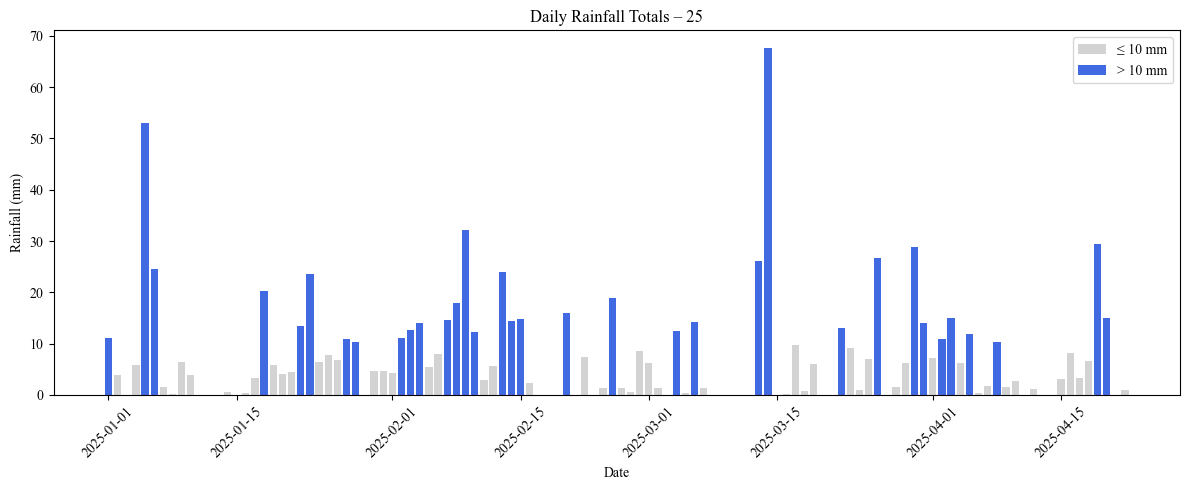

In [5]:
# Parse datetime
precip_df['Timestamp'] = pd.to_datetime(precip_df['Timestamp'], format='%d/%m/%Y %H:%M', dayfirst=True)

# Extract date
precip_df['Date'] = precip_df['Timestamp'].dt.date

# group by date
precip_daily = precip_df.groupby('Date')['Rain_mm_Tot'].sum().reset_index()

# wet/dry
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 10]
wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 10]

#
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(dry_days['Date'], dry_days['Rain_mm_Tot'], color='lightgray', label='≤ 10 mm')
ax.bar(wet_days['Date'], wet_days['Rain_mm_Tot'], color='royalblue', label='> 10 mm')
ax.set_title("Daily Rainfall Totals – 25")
ax.set_xlabel("Date")
ax.set_ylabel("Rainfall (mm)")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/2952704713.py:15: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ts12.loc[ts12['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/2952704713.py:16: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ts12.loc[ts12['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/2952704713.py:20: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future versi

Example VOD dates: <DatetimeArray>
['2025-01-01 00:00:00', '2025-01-02 00:00:00', '2025-01-03 00:00:00',
 '2025-01-04 00:00:00', '2025-01-05 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet day matches: 1320
Dry day matches: 1368
wetdry
dry     1368
wet     1320
none    1000
Name: count, dtype: int64


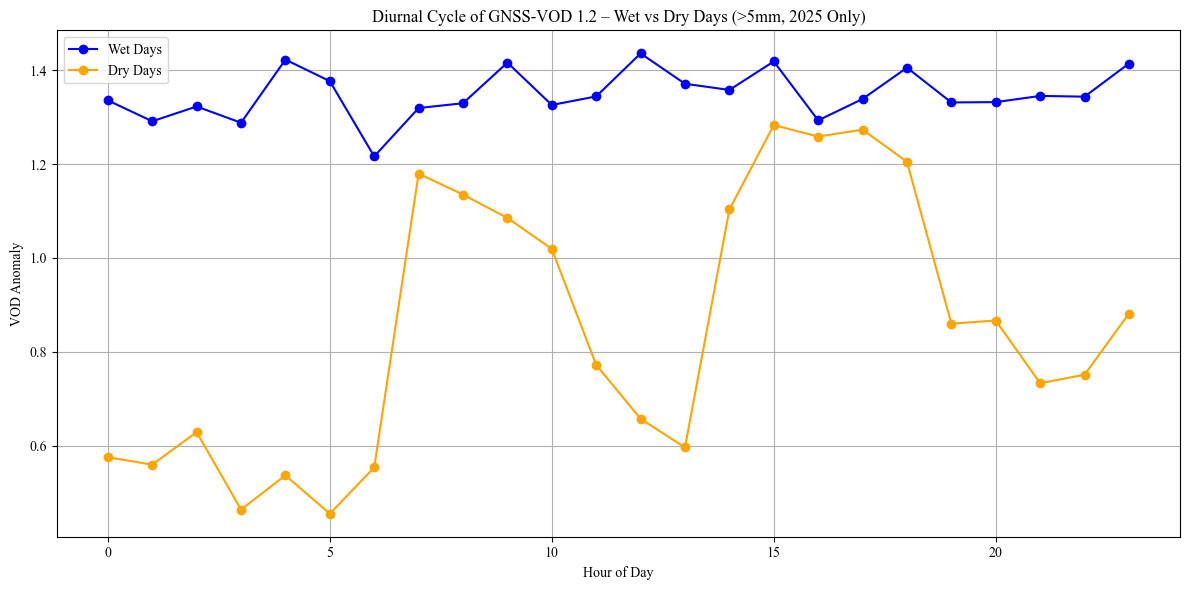

In [6]:
#  wet/dry days
wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 5]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 5]['Date']

# 
ts12['Epoch'] = pd.to_datetime(ts12['Epoch'])  
ts12.set_index('Epoch', inplace=True)
ts12['Date'] = ts12.index.normalize()

# ensuring 2025 dates 
ts12 = ts12[ts12['Date'].dt.year == 2025]

#  wet/dry 
ts12['wetdry'] = 'none'
ts12.loc[ts12['Date'].isin(wet_days), 'wetdry'] = 'wet'
ts12.loc[ts12['Date'].isin(dry_days), 'wetdry'] = 'dry'

#  checks
print("Example VOD dates:", ts12['Date'].unique()[:5])
print("Wet day matches:", ts12['Date'].isin(wet_days).sum())
print("Dry day matches:", ts12['Date'].isin(dry_days).sum())
print(ts12['wetdry'].value_counts())

# 
wet_data = ts12[ts12['wetdry'] == 'wet']
dry_data = ts12[ts12['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()

# 
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))
wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.2 – Wet vs Dry Days (>5mm, 2025 Only)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


Example VOD dates: <DatetimeArray>
['2025-01-01 00:00:00', '2025-01-02 00:00:00', '2025-01-03 00:00:00',
 '2025-01-04 00:00:00', '2025-01-05 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet day matches: 1320
Dry day matches: 1368
wetdry
dry     1368
wet     1320
none    1000
Name: count, dtype: int64


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/2748749668.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ts12.loc[ts12['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/2748749668.py:8: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  ts12.loc[ts12['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/2748749668.py:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version

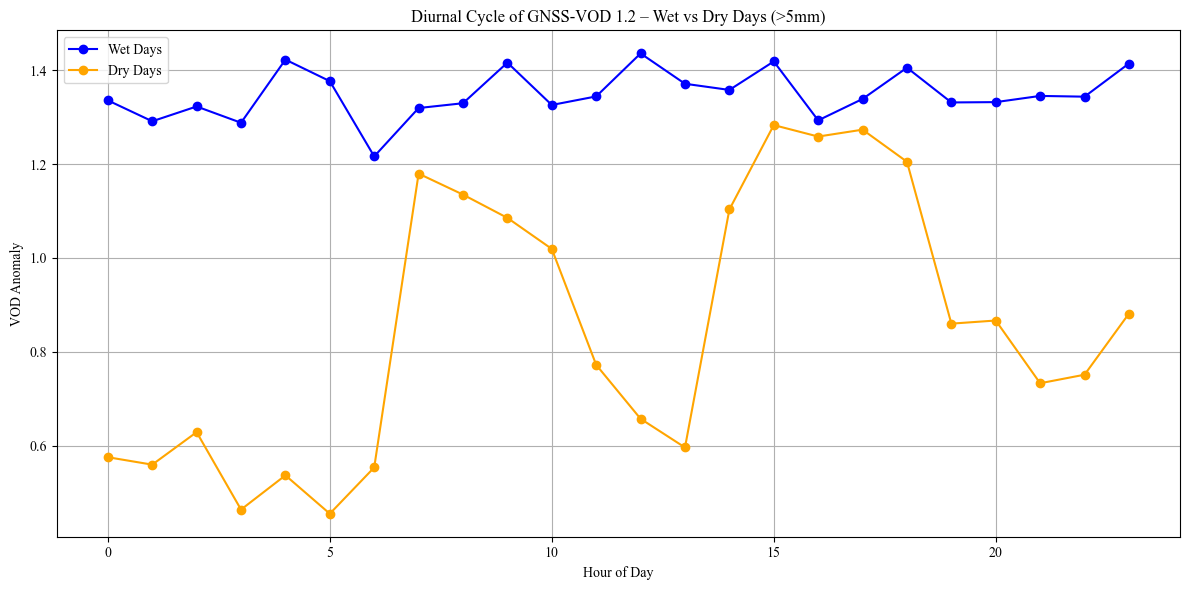

In [7]:
#5mm
wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 5]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 5]['Date']

#  wet/dry 
ts12['wetdry'] = 'none'
ts12.loc[ts12['Date'].isin(wet_days), 'wetdry'] = 'wet'
ts12.loc[ts12['Date'].isin(dry_days), 'wetdry'] = 'dry'

#  checks
print("Example VOD dates:", ts12['Date'].unique()[:5])
print("Wet day matches:", ts12['Date'].isin(wet_days).sum())
print("Dry day matches:", ts12['Date'].isin(dry_days).sum())
print(ts12['wetdry'].value_counts())

# 
wet_data = ts12[ts12['wetdry'] == 'wet']
dry_data = ts12[ts12['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()

# 
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))
wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.2 – Wet vs Dry Days (>5mm)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

In [8]:
morets12 = pd.read_csv(base_path + 'vod_moretsveg12.csv')
print(morets12.columns)

Index(['Epoch', 'VOD1', 'VOD2', 'Azimuth', 'Elevation', 'CellID', 'VOD1_mean',
       'VOD1_std', 'VOD1_count', 'VOD2_mean', 'VOD2_std', 'VOD2_count',
       'Azimuth_mean', 'Azimuth_std', 'Azimuth_count', 'Elevation_mean',
       'Elevation_std', 'Elevation_count', 'VOD1_anom', 'VOD2_anom'],
      dtype='object')


Example VOD dates: <DatetimeArray>
['2023-01-14 00:00:00', '2023-01-15 00:00:00', '2023-01-27 00:00:00',
 '2023-01-28 00:00:00', '2023-01-29 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet matches: 84
Dry matches: 65
wetdry
none    893
wet      84
dry      65
Name: count, dtype: int64


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/3149501306.py:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  morets12.loc[morets12['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/3149501306.py:13: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  morets12.loc[morets12['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/3149501306.py:17: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. I

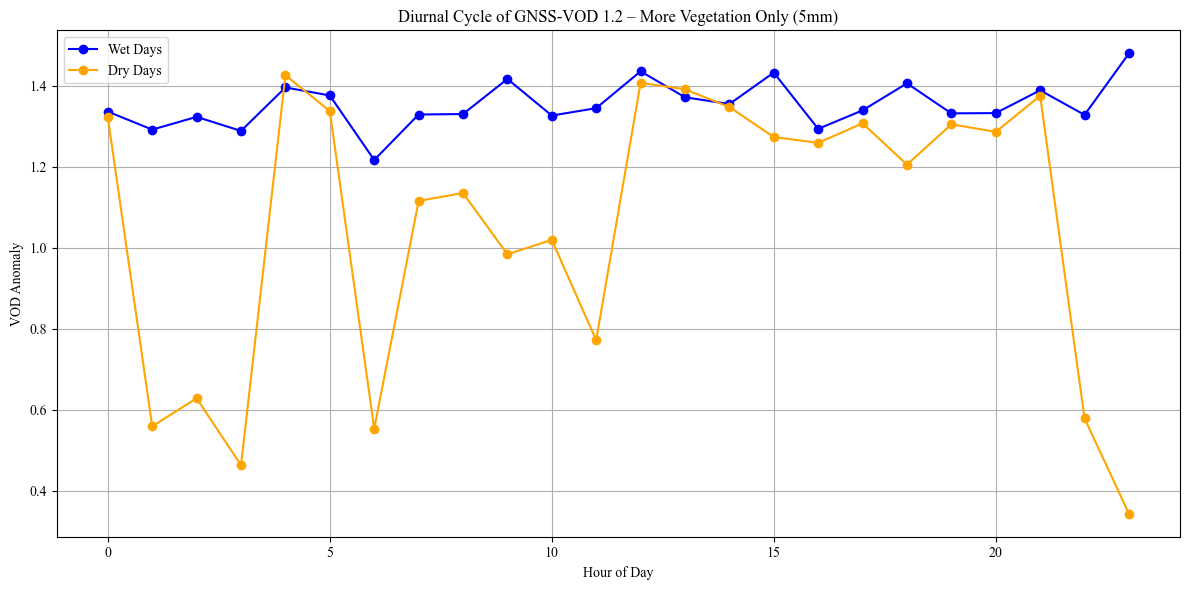

In [9]:
#5mm
wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 5]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 5]['Date']

#
morets12['Epoch'] = pd.to_datetime(morets12['Epoch'])
morets12.set_index('Epoch', inplace=True)
morets12['Date'] = morets12.index.normalize()

#  wet/dry 
morets12['wetdry'] = 'none'
morets12.loc[morets12['Date'].isin(wet_days), 'wetdry'] = 'wet'
morets12.loc[morets12['Date'].isin(dry_days), 'wetdry'] = 'dry'

# Checkss
print("Example VOD dates:", morets12['Date'].unique()[:5])
print("Wet matches:", morets12['Date'].isin(wet_days).sum())
print("Dry matches:", morets12['Date'].isin(dry_days).sum())
print(morets12['wetdry'].value_counts())

#
wet_data = morets12[morets12['wetdry'] == 'wet']
dry_data = morets12[morets12['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()

# 
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))
wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.2 – More Vegetation Only (5mm)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/1401892937.py:8: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  morets12.loc[morets12['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/1401892937.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  morets12.loc[morets12['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/1401892937.py:13: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In 

Example VOD dates: <DatetimeArray>
['2023-01-14 00:00:00', '2023-01-15 00:00:00', '2023-01-27 00:00:00',
 '2023-01-28 00:00:00', '2023-01-29 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet matches: 84
Dry matches: 65
wetdry
none    893
wet      84
dry      65
Name: count, dtype: int64


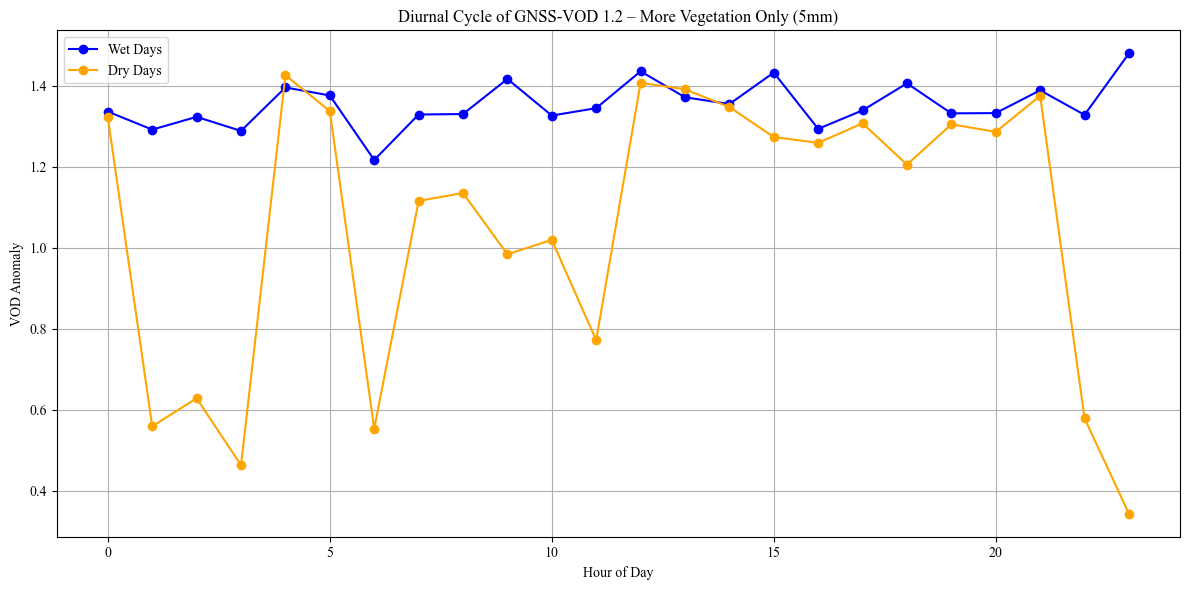

In [10]:
#5mm
wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 5]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 5]['Date']


#  wet/dry 
morets12['wetdry'] = 'none'
morets12.loc[morets12['Date'].isin(wet_days), 'wetdry'] = 'wet'
morets12.loc[morets12['Date'].isin(dry_days), 'wetdry'] = 'dry'

# Checks
print("Example VOD dates:", morets12['Date'].unique()[:5])
print("Wet matches:", morets12['Date'].isin(wet_days).sum())
print("Dry matches:", morets12['Date'].isin(dry_days).sum())
print(morets12['wetdry'].value_counts())

#
wet_data = morets12[morets12['wetdry'] == 'wet']
dry_data = morets12[morets12['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()

# 
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))
wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.2 – More Vegetation Only (5mm)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


In [11]:
lessts12= pd.read_csv(base_path + 'vod_lesstsveg12.csv')

Example VOD dates: <DatetimeArray>
['2023-01-14 00:00:00', '2023-01-27 00:00:00', '2023-01-28 00:00:00',
 '2023-01-29 00:00:00', '2023-02-08 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet matches: 12
Dry matches: 19
wetdry
none    158
dry      19
wet      12
Name: count, dtype: int64


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/322756247.py:11: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  lessts12.loc[lessts12['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/322756247.py:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  lessts12.loc[lessts12['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/322756247.py:16: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a

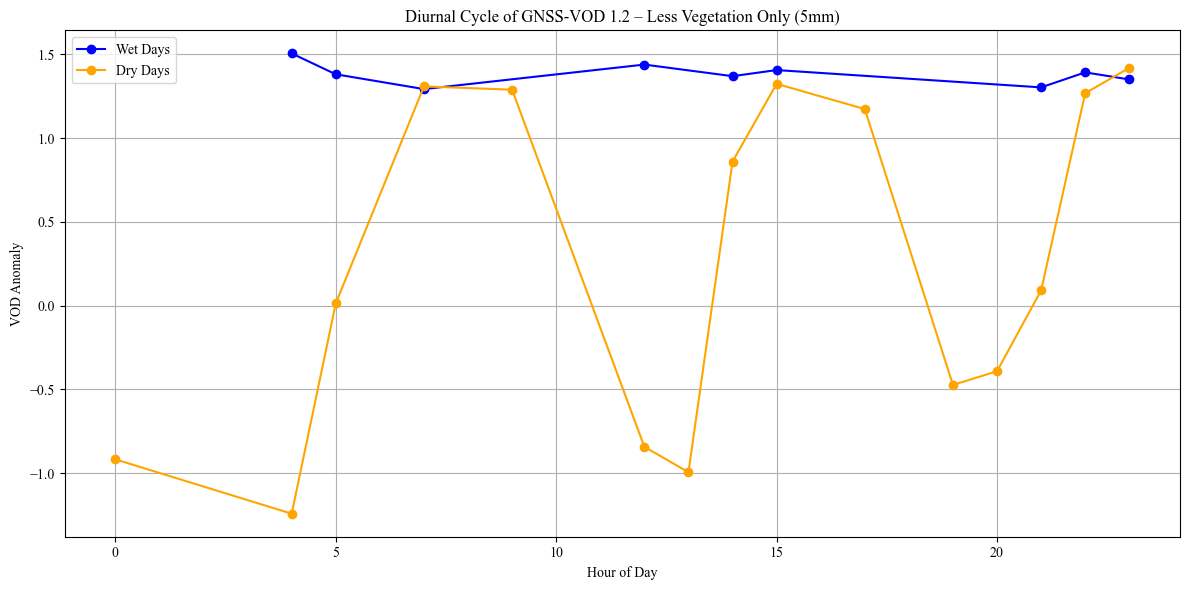

In [12]:
#5mm
wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 5]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 5]['Date']


lessts12['Epoch'] = pd.to_datetime(lessts12['Epoch']) 
lessts12.set_index('Epoch', inplace=True)
lessts12['Date'] = lessts12.index.normalize()
#  wet/dry 
lessts12['wetdry'] = 'none'
lessts12.loc[lessts12['Date'].isin(wet_days), 'wetdry'] = 'wet'
lessts12.loc[lessts12['Date'].isin(dry_days), 'wetdry'] = 'dry'

# Checks
print("Example VOD dates:", lessts12['Date'].unique()[:5])
print("Wet matches:", lessts12['Date'].isin(wet_days).sum())
print("Dry matches:", lessts12['Date'].isin(dry_days).sum())
print(lessts12['wetdry'].value_counts())

# 
wet_data = lessts12[lessts12['wetdry'] == 'wet']
dry_data = lessts12[lessts12['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()

# 
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))
wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.2 – Less Vegetation Only (5mm)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


Example VOD dates: <DatetimeArray>
['2023-01-14 00:00:00', '2023-01-27 00:00:00', '2023-01-28 00:00:00',
 '2023-01-29 00:00:00', '2023-02-08 00:00:00']
Length: 5, dtype: datetime64[ns]
Wet matches: 6
Dry matches: 25
wetdry
none    158
dry      25
wet       6
Name: count, dtype: int64


/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/3285340098.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  lessts12.loc[lessts12['Date'].isin(wet_days), 'wetdry'] = 'wet'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/3285340098.py:8: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  lessts12.loc[lessts12['Date'].isin(dry_days), 'wetdry'] = 'dry'
/var/folders/fh/962dt8rs1zd8vch980_pv5yc0000gn/T/ipykernel_97911/3285340098.py:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In 

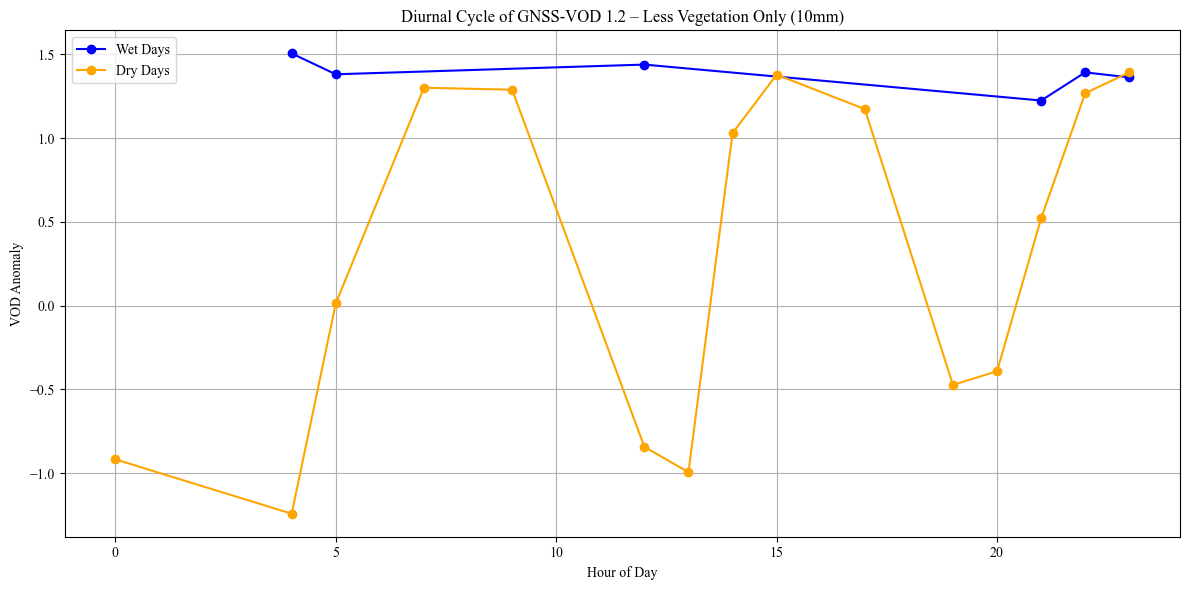

In [13]:

# 10mm
wet_days = precip_daily[precip_daily['Rain_mm_Tot'] > 10]['Date']
dry_days = precip_daily[precip_daily['Rain_mm_Tot'] <= 10]['Date']

#  wet/dry 
lessts12['wetdry'] = 'none'
lessts12.loc[lessts12['Date'].isin(wet_days), 'wetdry'] = 'wet'
lessts12.loc[lessts12['Date'].isin(dry_days), 'wetdry'] = 'dry'

# Checks
print("Example VOD dates:", lessts12['Date'].unique()[:5])
print("Wet matches:", lessts12['Date'].isin(wet_days).sum())
print("Dry matches:", lessts12['Date'].isin(dry_days).sum())
print(lessts12['wetdry'].value_counts())

# 
wet_data = lessts12[lessts12['wetdry'] == 'wet']
dry_data = lessts12[lessts12['wetdry'] == 'dry']
wet_diurnal = wet_data.groupby(wet_data.index.hour)['VOD1_anom'].mean()
dry_diurnal = dry_data.groupby(dry_data.index.hour)['VOD1_anom'].mean()

# 
plt.rcParams["font.family"] = "Times New Roman"
fig, ax = plt.subplots(figsize=(12, 6))
wet_diurnal.plot(ax=ax, marker='o', label='Wet Days', color='blue')
dry_diurnal.plot(ax=ax, marker='o', label='Dry Days', color='orange')
ax.set_title("Diurnal Cycle of GNSS-VOD 1.2 – Less Vegetation Only (10mm)")
ax.set_xlabel("Hour of Day")
ax.set_ylabel("VOD Anomaly")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()
